<a href="https://colab.research.google.com/github/Ninjastu007/statistic_by_appliedAI/blob/main/Logistic_regrssion_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [ ]:
# creating the dataset
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [ ]:
X.shape , y.shape 

((100, 2), (100,))

In [ ]:
# How the daaa look like 
X[ : 5 , ]   # row , column 

array([[ 0.51123145, -0.11697552],
       [ 0.06316371, -0.73115232],
       [-0.0425064 , -0.7081059 ],
       [-3.2891569 , -2.01199214],
       [ 0.1111445 ,  1.63493163]])

In [ ]:
y[ : 5 , ]

array([1, 1, 1, 0, 1])

In [ ]:
# let's define the activation function 

def sigmoid(z):
  return 1 / ( 1 +  np.exp(-z) )


# # driver code 
# sigmoid(-50)

In [ ]:
# initialize the weights 
# columns = 2 
# for intercept we need to add one col to dataset 

inserted  = np.insert( X , 0 , 1.0 , axis= 1 )
print(inserted .shape ,inserted[:1 , ])


(100, 3) [[ 1.          0.51123145 -0.11697552]]


In [ ]:
weights = np.ones(X.shape[1])
weights


array([1., 1.])

In [ ]:
def gradient_descent(X, y , no_iterations , learning_rate ):
  X = np.insert(X , 0 , 1  , axis=1  )
  weights = np.ones(X.shape[1])
  # predict the Output 
  for i in range(0 ,  no_iterations ):
    y_hat = sigmoid(np.dot(X , weights )) 
    weights = weights + learning_rate * (np.dot((y-y_hat),X)/X.shape[0])     # w_new =  w + (1/m )*  lr * dl/dx 
  # return slopes , bias/intercept 
  return weights[1:],weights[0]

In [ ]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        

In [ ]:
gd(X,y)

(array([4.83926872, 0.21182255]), 5.83338864905325)

In [ ]:
coef_ , intercept_ = gradient_descent( X , y ,no_iterations=  5000 , learning_rate=0.01)
print(coef_ )
print(intercept_)

[2.48614741 0.18952951]
2.3001101852133363


In [ ]:
# prediction and result 
y_true = y.copy()
x = X.copy() 
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [ ]:
# x_input = np.linspace(-3,3,100)
# y_input = m1*x_input + b1

In [ ]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

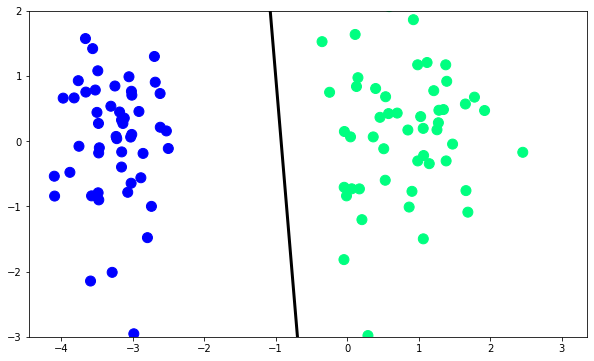

In [ ]:
plt.figure(figsize=(10,6))
# plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)